## Analysis of a real network

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import linregress

#### Read in the network

In [2]:
colnames=['SOURCE', 'TARGET', 'RATING', 'TIME'] 
df = pd.read_csv('../data/soc-sign-bitcoinalpha.csv.gz', names=colnames, header=None)
df.drop('RATING', axis=1) 
df['TIME'] = pd.to_datetime(df['TIME'], unit='s')
df

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,2014-08-08 04:00:00
1,430,1,10,2013-08-15 04:00:00
2,3134,1,10,2013-05-28 04:00:00
3,3026,1,10,2012-10-12 04:00:00
4,3010,1,10,2012-09-17 04:00:00
...,...,...,...,...
24181,7604,7601,10,2013-03-26 04:00:00
24182,7601,7604,10,2013-03-26 04:00:00
24183,7604,7602,10,2013-03-26 04:00:00
24184,7602,7604,10,2013-03-26 04:00:00


#### Analysis

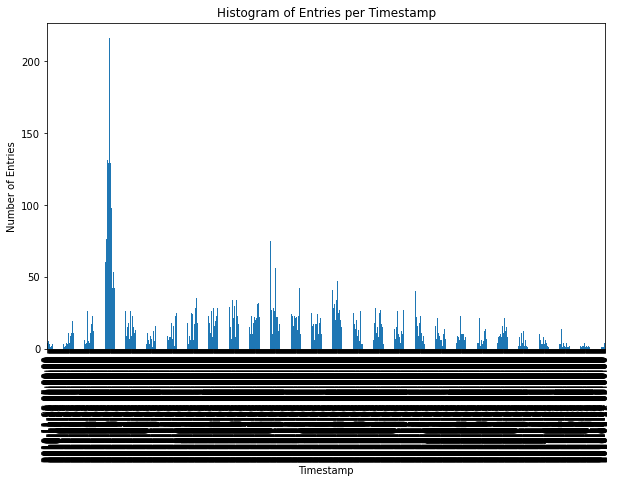

In [3]:
# Count the number of entries for each timestamp
entries_per_timestamp = df['TIME'].value_counts().sort_index()

# Create the histogram
plt.figure(figsize=(10, 6))
entries_per_timestamp.plot(kind='bar')
plt.xlabel('Timestamp')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries per Timestamp')
plt.show()

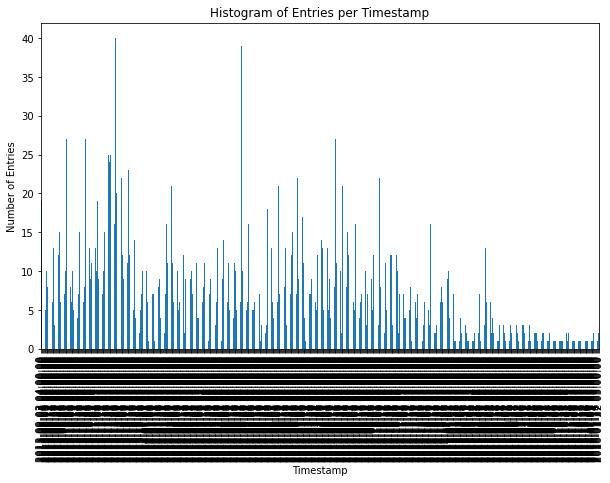

In [4]:

# Create the histogram
plt.figure(figsize=(10, 6))
entries_per_timestamp[1000:].plot(kind='bar')
plt.xlabel('Timestamp')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries per Timestamp')
plt.show()

In [5]:
# Extract the edges from the datafram
edges = df[['SOURCE', 'TARGET']].values.tolist()
edgesnew = [(x, y) for x, y in edges]

In [6]:
# Create a networkx graph

G = nx.Graph()
# Add edges to the graph
G.add_edges_from(edgesnew)

##### Degree distribution

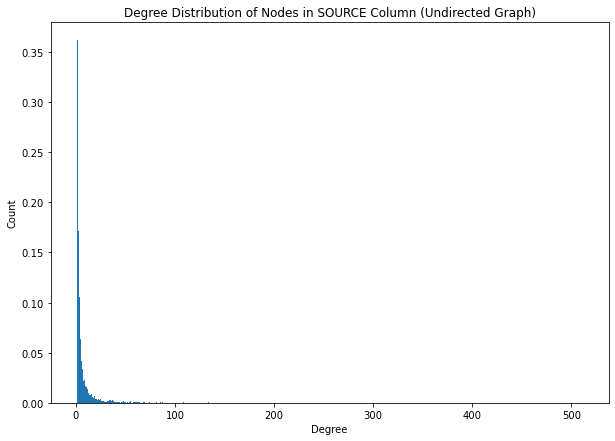

In [7]:
# Calculate the degree of each node in the 'SOURCE' column
degree_distribution = dict(G.degree())

# Linear scale
# Create a histogram of the degree distribution
plt.figure(figsize = (10, 7))
plt.hist(degree_distribution.values(), bins=range(max(degree_distribution.values()) + 2), density = True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in SOURCE Column (Undirected Graph)')
plt.show()

In [8]:
# Convert to loglog
x = np.array(list(degree_distribution.keys()))
y = np.array(list(degree_distribution.values()))

x_delta = np.delete(x, np.argwhere(y==0))
y_delta = np.delete(y, np.argwhere(y==0))


xlog = np.log10(x_delta)
ylog = np.log10(y_delta)

In [9]:
# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(xlog, ylog)

# Regression line
y_fit_delta = 10**intercept_delta * x_delta**(slope_delta)
#y_analytic_delta = x_delta**(-3)
y_analytic_delta = 1/ np.power(x_delta, 3)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))

The power law exponent of the degree distribution using a delta fitness distribution is 0.814


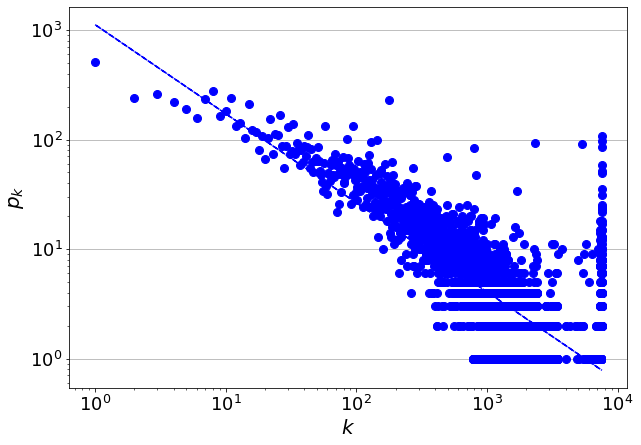

In [10]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(x, y, 'bo', markersize=8)
plt.loglog(x_delta, y_fit_delta, color = 'blue', linestyle = 'dashed')

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

In [11]:
# List to store the degrees of nodes
degrees = []

# Iterate over nodes and get their degrees
for node in G.nodes():
    degree = G.degree(node)
    degrees.append(degree)

print(len(degrees))

3783


##### Properties of the network

In [12]:
# Add nodes and edges to the graph (assuming the graph is already populated)

# Get the largest connected component
largest_component = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_component)

# Calculate average path length
avg_path_length = nx.average_shortest_path_length(subgraph)

# Calculate average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G)

print("Average Path Length:", avg_path_length)
print("Average Clustering Coefficient:", avg_clustering_coefficient)

Average Path Length: 3.570840431393606
Average Clustering Coefficient: 0.1766290303590772


In [13]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Print top 5 highly connected hubs
print("Highly connected hubs:")
for node in sorted_nodes[:5]:
    print("Node:", node, "Degree Centrality:", degree_centrality[node])


r = nx.degree_assortativity_coefficient(G)
print('Assortativity coefficient:', r)

num_attacks = 10  # Number of hubs to remove
removed_hubs = sorted_nodes[:num_attacks]

print("Initial number of connected components:", nx.number_connected_components(G))

    # Remove the targeted hubs
for hub in removed_hubs:
    G.remove_node(hub)

print("Number of connected components after attacks:", nx.number_connected_components(G))

# Calculate clustering coefficient of the Barabási-Albert network
clustering_coefficient = nx.average_clustering(G)
print("Clustering coefficient after attack:", clustering_coefficient)
    

Highly connected hubs:
Node: 1 Degree Centrality: 0.1351136964569011
Node: 8 Degree Centrality: 0.07377049180327869
Node: 3 Degree Centrality: 0.06953992596509784
Node: 2 Degree Centrality: 0.06319407720782655
Node: 11 Degree Centrality: 0.06292966684294024
Assortativity coefficient: -0.16851576112150454
Initial number of connected components: 5
Number of connected components after attacks: 338
Clustering coefficient after attack: 0.1262386628418399
